In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 25.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import re
import nltk
import emoji
import string
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import TweetTokenizer

In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/tweet_data.csv')

In [ ]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
lemmatizer = WordNetLemmatizer()
tk = TweetTokenizer()

In [ ]:
stopwords = ["i", "am", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself",
        "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
        "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that",
        "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had",
        "having", "do", "does", "did", "doing", "a", "an", "the", "and", "if", "or", "because", "as",
        "until", "while", "of", "at", "by", "for", "with", "about", "between", "into", "through",
        "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off",
        "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all",
        "any", "both", "each", "other", "such", "own", "same", "so", "than", "s", "t", "can", "will", "just", "now"]

punctuations = ["+", ",", ".", "-", "\\", "&", "!", "?", ":", ";", "#", "~", "=", "/", "$", "£", "^", "(", ")", "_", "<", ">"]

In [ ]:
dict_smileys = {
        ":-)":"smiley", ":-]":"smiley", ":-3":"smiley", ":->":"smiley", "8-)":"smiley", ":-}":"smiley", ":)":"smiley", ":]":"smiley",
        ":3":"smiley", ":>":"smiley", "8)":"smiley", ":}":"smiley", ":o)":"smiley", ":c)":"smiley", ":^)":"smiley", "=]":"smiley",
        "=)":"smiley", ":-))":"smiley", ":‑D":"smiley", "8‑D":"smiley","x‑D":"smiley","X‑D":"smiley",":D":"smiley", "8D":"smiley","xD":"smiley",
        "XD":"smiley", ":‑(":"sad", ":‑c":"sad",":‑<":"sad",":‑[":"sad",":(":"sad",":c":"sad",":<":"sad",":[":"sad", ":-||":"sad", ">:[":"sad",
        ":{":"sad", ":@":"sad", ">:(":"sad", ":'‑(":"sad", ":'(":"sad", ":‑P":"playful", "X‑P":"playful", "x‑p":"playful", ":‑p":"playful",
        ":‑Þ":"playful", ":‑þ":"playful", ":‑b":"playful", ":P":"playful", "XP":"playful", "xp":"playful",":p":"playful",":Þ":"playful",
        ":þ":"playful", ":b":"playful", "<3":"love"
        }


dict_contractions = {
        "ain't":"is not", "amn't":"am not", "aren't":"are not", "can't":"cannot", "'cause":"because", "couldn't":"could not","couldn't've":"could not have",
        "could've":"could have","daren't":"dare not","daresn't":"dare not","dasn't":"dare not","didn't":"did not","doesn't":"does not","don't":"do not",
        "e'er":"ever","em":"them","everyone's":"everyone is","finna":"fixing to","gimme":"give me","gonna":"going to","gon't":"go not","gotta":"got to",
        "hadn't":"had not","hasn't":"has not","haven't":"have not","he'd":"he would","he'll":"he will","he's":"he is","he've":"he have",
        "how'd":"how would","how'll":"how will", "how're":"how are", "how's":"how is", "I'd":"I would", "I'll":"I will",
        "I'm":"I am","I'm'a":"I am about to","I'm'o":"I am going to","isn't":"is not",
        "it'd":"it would","it'll":"it will","it's":"it is","I've":"I have","kinda":"kind of","let's":"let us","mayn't":"may not",
        "may've":"may have","mightn't":"might not","might've":"might have","mustn't":"must not", "mustn't've":"must not have", "must've":"must have",
        "needn't":"need not","ne'er":"never", "o'":"of", "o'er":"over", "ol'":"old", "oughtn't":"ought not", "shalln't":"shall not", "shan't":"shall not",
        "she'd":"she would","she'll":"she will","she's":"she is","shouldn't":"should not","shouldn't've":"should not have","should've":"should have",
        "somebody's":"somebody is", "someone's":"someone is", "something's":"something is", "that'd":"that would", "that'll":"that will", "that're":"that are",
        "that's":"that is","there'd":"there would","there'll":"there will","there're":"there are","there's":"there is","these're":"these are",
        "they'd":"they would","they'll":"they will","they're":"they are","they've":"they have","this's":"this is","those're":"those are", "'tis":"it is",
        "'twas":"it was", "wanna":"want to", "wasn't":"was not", "we'd":"we would", "we'd've":"we would have", "we'll":"we will", "we're":"we are",
        "weren't":"were not",
        "we've":"we have","what'd":"what did","what'll":"what will","what're":"what are","what's":"what is","what've":"what have","when's":"when is",
        "where'd":"where did","where're":"where are","where's":"where is","where've":"where have","which's":"which is","who'd":"who would",
        "who'd've":"who would have","who'll":"who will","who're":"who are","who's":"who is","who've":"who have","why'd":"why did","why're":"why are",
        "why's":"why is","won't":"will not","wouldn't":"would not","would've":"would have","y'all":"you all","you'd":"you would",
        "you'll":"you will", "you're":"you are","you've":"you have","Whatcha":"What are you","luv":"love","sux":"sucks"
        }

In [ ]:
def load_glove_embeddings(file_path):
    embeddings_index = {}
    with open(file_path, encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

glove_path = '/content/gdrive/MyDrive/glove.twitter.27B.200d.txt'
embeddings_index = load_glove_embeddings(glove_path)

In [ ]:
def tweet_preprocess(tweet):
    tweet = emoji.demojize(tweet)
    tweet = tweet.lower()   #Converting to Lowercase
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet)  #Removing URLs
    tweet = re.sub(r'^RT[\s]+', '', tweet)   #Removing re-tweet text
    tweet = re.sub(r'\b\w\b', '', tweet) #Removing Single Letters
    tweet = re.sub(r'[\@\#]', '', tweet)  #Removing Hastags and targets (@)
    tweet = re.sub(r'\d+', '', tweet)  #Removing Numbers
    tweet = re.sub(r'\s+', ' ', tweet).strip()  # Removing extra spaces
    for smiley, meaning in dict_smileys.items(): #Emoticons
        tweet = tweet.replace(smiley, meaning)
    for contraction, expanded in dict_contractions.items():  #Contractions
        tweet = tweet.replace(contraction, expanded)
    tweet = tk.tokenize(tweet)  #Tokenizing the tweet
    pos_tags = pos_tag(tweet)
    tweet = [word for word in tweet if word not in stopwords and word not in punctuations]  #Removing Stop words and Punctuations
    final_tweet=[]
    for token,tag in pos_tag(tweet):   #Lemmatizing the tweet
        if token.isdigit():
            continue

        pos=tag[0].lower()
        if pos not in ['a', 'r', 'n', 'v']:
            pos='n'
        final_tweet.append(lemmatizer.lemmatize(token,pos))

    return ' '.join(final_tweet)

In [ ]:
data['processed_text'] = data['Text'].apply(tweet_preprocess)

In [ ]:
X = data['processed_text']
y = data['Sentiment']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def tweet_to_vector(tweet, embeddings_index, embedding_dim=200):
    words = tweet.split()
    tweet_vector = np.zeros(embedding_dim)
    count = 0
    for word in words:
        if word in embeddings_index:
            tweet_vector += embeddings_index[word]
            count += 1
    if count > 0:
        tweet_vector /= count
    return tweet_vector

# Convert tweets to vectors
X_train_vectors = np.array([tweet_to_vector(tweet, embeddings_index) for tweet in X_train])
X_test_vectors = np.array([tweet_to_vector(tweet, embeddings_index) for tweet in X_test])

In [ ]:
class MultiClassLogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.classifiers = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.classes = np.unique(y)

        for c in self.classes:
            y_binary = (y == c).astype(int)
            theta = np.zeros(X.shape[1])

            for _ in range(self.num_iterations):
                z = np.dot(X, theta)
                h = self.sigmoid(z)
                gradient = np.dot(X.T, (h - y_binary)) / y_binary.size
                theta -= self.learning_rate * gradient

            self.classifiers.append(theta)

    def predict_proba(self, X):
        probas = []
        for theta in self.classifiers:
            z = np.dot(X, theta)
            probas.append(self.sigmoid(z))
        return np.column_stack(probas)

    def predict(self, X):
        probas = self.predict_proba(X)
        return self.classes[np.argmax(probas, axis=1)]

In [ ]:
# Initialize and train the model
model = MultiClassLogisticRegression(learning_rate=0.01, num_iterations=1000)
model.fit(X_train_vectors, y_train)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test_vectors)

Accuracy: 0.6975
              precision    recall  f1-score   support

        -1.0       0.67      0.90      0.77       357
         0.0       0.00      0.00      0.00       156
         1.0       0.73      0.79      0.75       396

    accuracy                           0.70       909
   macro avg       0.47      0.56      0.51       909
weighted avg       0.58      0.70      0.63       909



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

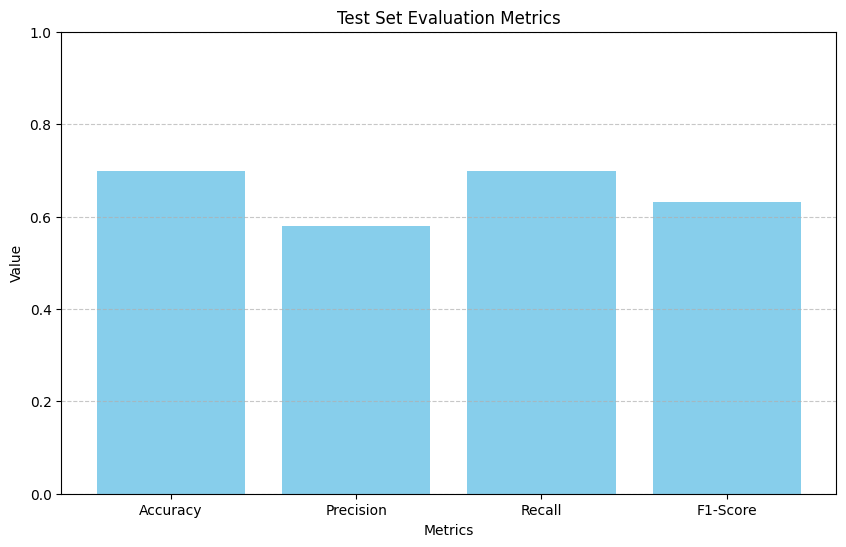

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Generate and print the classification report
report = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

# Extract precision, recall, and f1-score for the overall weighted average
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1 = report['weighted avg']['f1-score']

# Store the metrics in a dictionary for plotting
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
}

# Plot the metrics in a bar chart
plt.figure(figsize=(10, 6))
plt.bar(metrics.keys(), metrics.values(), color='skyblue')
plt.ylim(0, 1)
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Test Set Evaluation Metrics')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
